## **`Perceptron in Problem`**

### `Not matter what Perceptron can not perform XOR functionality`
`It works on Linear data only`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [3]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [4]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

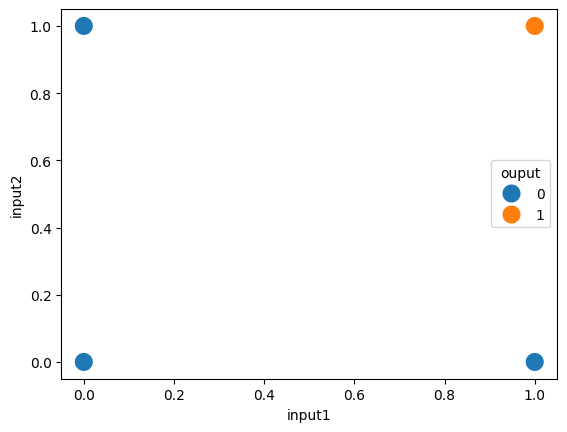

In [11]:
sns.scatterplot(x='input1', y='input2', hue='ouput', data=and_data, s=200)

In [12]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

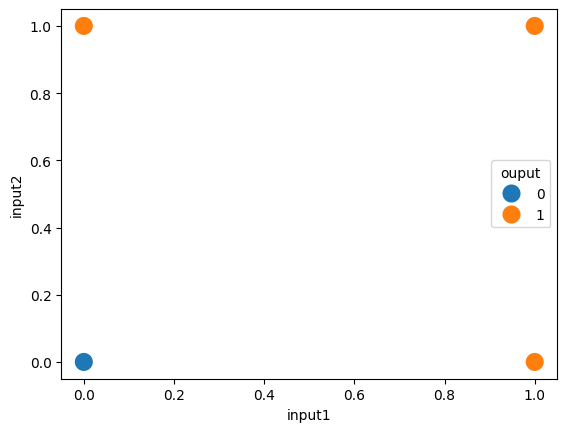

In [13]:
sns.scatterplot(x='input1', y='input2', hue='ouput', data=or_data, s=200)

In [14]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [15]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [16]:
clf1.coef_

array([[2., 2.]])

In [17]:
clf1.intercept_

array([-2.])

In [18]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

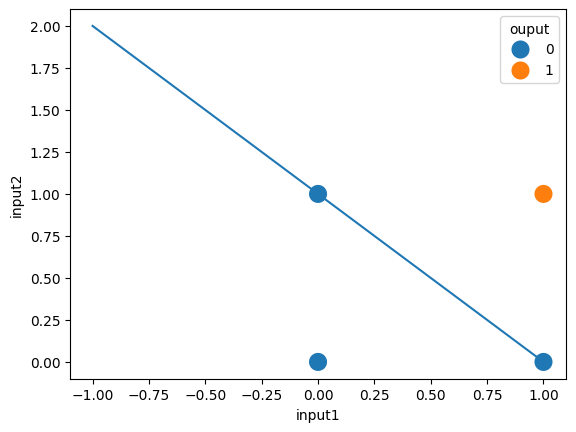

In [19]:
plt.plot(x,y)
sns.scatterplot(x='input1', y='input2', hue='ouput', data=and_data, s=200)

In [20]:
clf2.coef_

array([[2., 2.]])

In [21]:
clf2.intercept_

array([-1.])

In [22]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

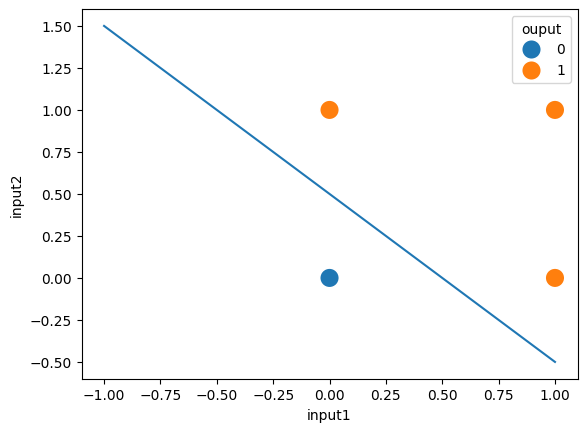

In [23]:
plt.plot(x1,y1)
sns.scatterplot(x='input1', y='input2', hue='ouput', data=or_data, s=200)

In [24]:
clf3.coef_

array([[0., 0.]])

In [25]:
clf3.intercept_

array([0.])

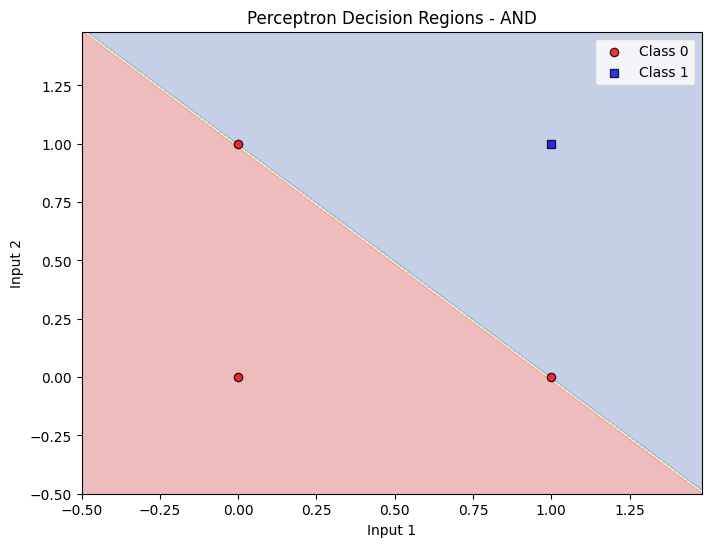

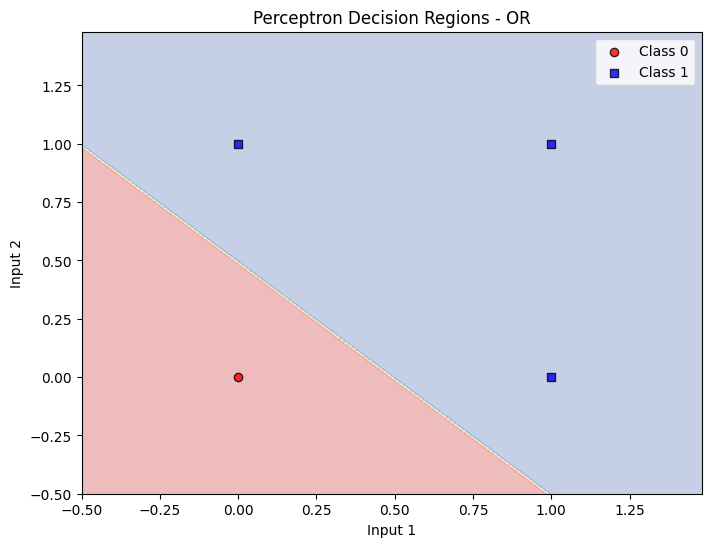

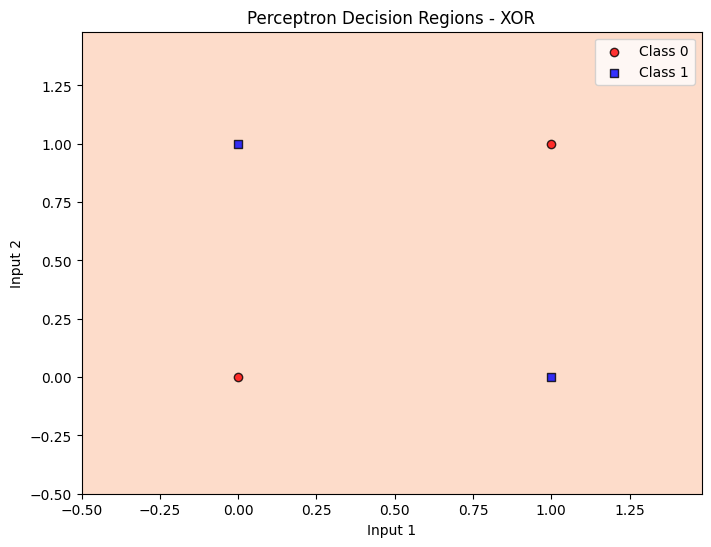

In [27]:
# Define the plot_decision_regions function
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

# Create DataFrames for logical operations
and_data = pd.DataFrame({'input1': [1, 1, 0, 0], 'input2': [1, 0, 1, 0], 'output': [1, 0, 0, 0]})
or_data = pd.DataFrame({'input1': [1, 1, 0, 0], 'input2': [1, 0, 1, 0], 'output': [1, 1, 1, 0]})
xor_data = pd.DataFrame({'input1': [1, 1, 0, 0], 'input2': [1, 0, 1, 0], 'output': [0, 1, 1, 0]})

# Train Perceptrons
clf1 = Perceptron().fit(and_data.iloc[:, 0:2].values, and_data.iloc[:, -1].values)
clf2 = Perceptron().fit(or_data.iloc[:, 0:2].values, or_data.iloc[:, -1].values)
clf3 = Perceptron().fit(xor_data.iloc[:, 0:2].values, xor_data.iloc[:, -1].values)

# Plot decision regions for AND operation
plt.figure(figsize=(8, 6))
plot_decision_regions(and_data.iloc[:, 0:2].values, and_data.iloc[:, -1].values, classifier=clf1)
plt.title('Perceptron Decision Regions - AND')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()

# Plot decision regions for OR operation
plt.figure(figsize=(8, 6))
plot_decision_regions(or_data.iloc[:, 0:2].values, or_data.iloc[:, -1].values, classifier=clf2)
plt.title('Perceptron Decision Regions - OR')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()

# Plot decision regions for XOR operation
plt.figure(figsize=(8, 6))
plot_decision_regions(xor_data.iloc[:, 0:2].values, xor_data.iloc[:, -1].values, classifier=clf3)
plt.title('Perceptron Decision Regions - XOR')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()
